In [18]:
import csv
from turtle import clear
from unittest import result
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

#finding mean values
df = pd.read_csv('HappinessData-1.csv')

#replace missing values with the mean value
list = df.fillna(df.mean()).values.tolist()

#move first column to the last column
result = []
for row in list:
    temp = []
    temp = row[1:]
    temp.append(row[0])
    result.append(temp)

with open('happiness_last.csv', 'w', newline= '') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['City Services Availability','Housing Cost','Quality of schools','Community trust in local police','Community Maintenance','Availability of Community Room ','Unhappy/Happy'])
    writer.writerows(result)

#Use Pearson Correlation
print(df.corr(method='pearson')) #City Services Avalibility seems to have the highest correlation value

#KNN
count = 0
training = []
testing = []
my_predict = []
num_neighbors = 5

#Building training and test set
with open('happiness_last.csv', newline= '') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        if(count > 0 and count < 113):
            row = [eval(x) for x in row]
            training.append(row)
        if(count >= 113):
            row = [eval(x) for x in row]
            testing.append(row)
        count = count + 1


#sorting function
def Sort_tuple(tup):
    tup.sort(key = lambda x: x[1])
    return tup

#predictions
def My_predict(training, testing):
    result =[]
    for test in testing:
        neighbors = []
        # print('test: ',test)
        for train in training:
            dist = 0
            # print('train: ',train)
            for i in range(len(test[:-1])):
                dist = dist + abs(test[i] - train[i])
            neighbors.append((train[-1], dist))
        Sort_tuple(neighbors)

        #find the closest neighbors
        value = 0
        for i in range(num_neighbors):
            # print(neighbors[i][0])
            value = value + float(neighbors[i][0])
        
        #calculate the prediction
        prediction_value = round(value/num_neighbors,0)
        result.append(int(prediction_value))
    return result


#scikit KNN
def SK_predict(training, testing):
    sk_predict = []
    x_train = []
    y_train = []
    x_test = []
    y_test =[]
    for row in training:
        x_train.append(row[:5])
        y_train.append(row[-1])
    for row in testing:
        x_test.append(row[:5])
        y_test.append(row[-1])

    neigh = KNeighborsClassifier(n_neighbors=num_neighbors)
    # neigh.fit(x,y)
    neigh.fit(x_train,y_train)
    for each in x_test:
        sk_predict.append(int(neigh.predict([each])[0]))
    return sk_predict


                                 Unhappy/Happy  City Services Availability  \
Unhappy/Happy                         1.000000                    0.318674   
City Services Availability            0.318674                    1.000000   
Housing Cost                          0.029136                    0.091476   
Quality of schools                    0.185241                    0.301210   
Community trust in local police       0.134094                    0.108897   
Community Maintenance                 0.214967                    0.407793   
Availability of Community Room        0.224575                    0.416341   

                                 Housing Cost  Quality of schools  \
Unhappy/Happy                        0.029136            0.185241   
City Services Availability           0.091476            0.301210   
Housing Cost                         1.000000            0.178418   
Quality of schools                   0.178418            1.000000   
Community trust in local polic

In [12]:
#built true values
true_predict = []
for row in testing:
    true_predict.append(int(row[-1]))

print('My predictions: ',My_predict(training, testing))
print('Scikit predictions',SK_predict(training, testing))
print('True values: ',true_predict)

def Predict_correct(predicted,true):
    result = 0
    for i in range(len(predicted)):
        if predicted[i] == true[i]:
            result = result + 1
    result = round(result / len(predicted),2)
    return result

print('My_predict correct predictions: ',Predict_correct(My_predict(training,testing),true_predict))
print('SK_predict correct predictions: ',Predict_correct(SK_predict(training,testing),true_predict))

My predictions:  [1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0]
Scikit predictions [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0]
True values:  [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1]
My_predict correct predictions:  0.5
SK_predict correct predictions:  0.61


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0.39, 0.57, 0.46, 0.54, 0.5, 0.54, 0.54, 0.57, 0.43, 0.54, 0.5, 0.57, 0.46, 0.5, 0.43, 0.43, 0.43, 0.46, 0.5]
[0.43, 0.57, 0.46, 0.57, 0.61, 0.64, 0.61, 0.61, 0.54, 0.46, 0.5, 0.54, 0.54, 0.36, 0.43, 0.46, 0.36, 0.43, 0.36]


Text(0, 0.5, 'My Accuracy')

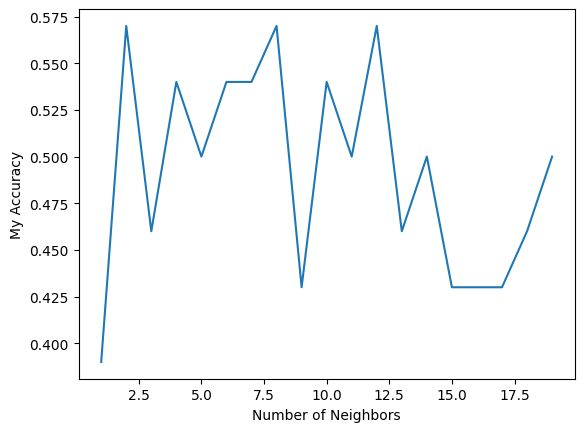

In [17]:
import matplotlib.pyplot as plt

num_neigh = []
my_accuracy = []
sk_accuracy = []

for i in range(1,20):
    num_neighbors = i
    num_neigh.append(i)
    my_accuracy.append(Predict_correct(My_predict(training,testing),true_predict))
    sk_accuracy.append(Predict_correct(SK_predict(training,testing),true_predict))
# print(num_neigh)
# print(my_accuracy)
# print(sk_accuracy)

#plot My_accuracy vs num of neighbors
plt.plot(num_neigh,my_accuracy)
plt.xlabel('Number of Neighbors')
plt.ylabel('My Accuracy')




Text(0, 0.5, 'SK Accuracy')

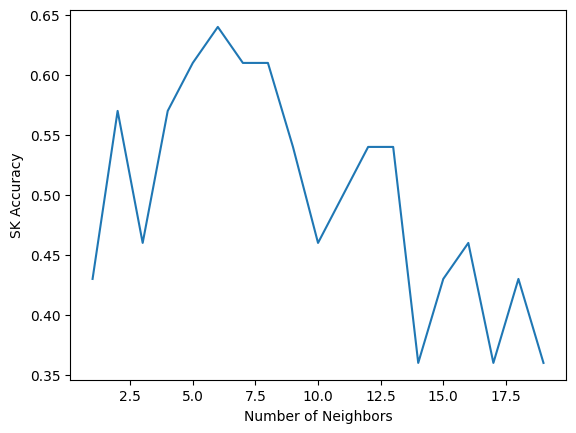

In [16]:
#plot SK_accuracy vs num of neighbors
plt.plot(num_neigh,sk_accuracy)
plt.xlabel('Number of Neighbors')
plt.ylabel('SK Accuracy')